In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd



from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:
# time.sleep(120)

In [3]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [4]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [5]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [6]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [7]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [8]:
# df

In [9]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 1, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 1, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 2, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 2, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 2, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 2, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 3, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 3, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 3, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 3, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 17, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 18, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 20, 'eu-central-1', 0, 4, 'FKE.pem', -1, 16,
# 21, 'eu-central-1', 0, 4, 'FKE.pem', -1, 17,
# 22, 'eu-central-1', 0, 4, 'FKE.pem', -1, 18,
# 23, 'eu-central-1', 0, 4, 'FKE.pem', -1, 19,
# 24, 'eu-central-1', 0, 5, 'FKE.pem', -1, 20,
# 25, 'eu-central-1', 0, 5, 'FKE.pem', -1, 21,
# 26, 'eu-central-1', 0, 5, 'FKE.pem', -1, 22,
# 27, 'eu-central-1', 0, 5, 'FKE.pem', -1, 23,
# 28, 'eu-central-1', 0, 6, 'FKE.pem', -1, 24,
# 29, 'eu-central-1', 0, 6, 'FKE.pem', -1, 25,
# 30, 'eu-central-1', 0, 6, 'FKE.pem', -1, 26,
# 31, 'eu-central-1', 0, 6, 'FKE.pem', -1, 27,
# 32, 'eu-central-1', 0, 7, 'FKE.pem', -1, 28,
# 33, 'eu-central-1', 0, 7, 'FKE.pem', -1, 29,
# 34, 'eu-central-1', 0, 7, 'FKE.pem', -1, 30,
# 35, 'eu-central-1', 0, 7, 'FKE.pem', -1, 31,
# 36, 'eu-central-1', 1, -1, 'FKE.pem', 4, -1,
# 37, 'eu-central-1', 1, -1, 'FKE.pem', 5, -1,
# 38, 'eu-central-1', 1, -1, 'FKE.pem', 6, -1,
# 39, 'eu-central-1', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west-2', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'us-west-2', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'us-west-2', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'us-west-2', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'us-west-2', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'us-west-2', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'us-west-2', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'us-west-2', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'us-west-2', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'us-west-2', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'us-west-2', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'us-west-2', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'us-west-2', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'us-west-2', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'us-west-2', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'us-west-2', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'us-west-2', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west-2', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west-2', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west-2', 1, -1, 'FKU2.pem', 11, -1,

In [10]:
%%file node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
20, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
21, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,



Overwriting node_info.csv


In [11]:
df =pd.read_csv('node_info.csv')

In [12]:
node_info_dict = df.to_dict()

In [13]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'ap-south-1'",
  21: " 'ap-south-1'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 1,
  21: 1},
 'cluster_id': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0

In [14]:

instance_type2 = 'c4.4xlarge'
redirect2 = '>>'

for index, region  in enumerate(regions):
    
    print(index, region)
    redirect = '>>'
    if index==0:
        redirect = '>'
        
    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")


    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    

#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_internal_ips")



#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_external_ips")
    
    
    
    
    

0 ap-south-1
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_internal_ips
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips


In [15]:
!cat all_internal_ips
! echo " " 
# !cat all_external_ips

65.0.130.217
65.1.64.33
43.204.29.47
3.110.127.96
13.127.234.115
3.109.139.214
43.205.178.255
13.126.253.253
13.127.202.234
13.233.65.99
13.233.25.98
13.127.151.227
65.0.72.131
65.0.26.217
13.234.232.235
35.154.62.78
3.110.147.127
13.127.103.149
13.235.103.220
3.111.169.213
65.2.187.238
13.232.110.183
 


In [16]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [17]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [18]:
data2, len(data2)

(['65.0.130.217',
  '65.1.64.33',
  '43.204.29.47',
  '3.110.127.96',
  '13.127.234.115',
  '3.109.139.214',
  '43.205.178.255',
  '13.126.253.253',
  '13.127.202.234',
  '13.233.65.99',
  '13.233.25.98',
  '13.127.151.227',
  '65.0.72.131',
  '65.0.26.217',
  '13.234.232.235',
  '35.154.62.78',
  '3.110.147.127',
  '13.127.103.149',
  '13.235.103.220',
  '3.111.169.213',
  '65.2.187.238',
  '13.232.110.183'],
 22)

In [19]:
data = []

In [20]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [21]:
data, len(data)

(['65.0.130.217    65.0.130.217',
  '65.1.64.33    65.1.64.33',
  '43.204.29.47    43.204.29.47',
  '3.110.127.96    3.110.127.96',
  '13.127.234.115    13.127.234.115',
  '3.109.139.214    3.109.139.214',
  '43.205.178.255    43.205.178.255',
  '13.126.253.253    13.126.253.253',
  '13.127.202.234    13.127.202.234',
  '13.233.65.99    13.233.65.99',
  '13.233.25.98    13.233.25.98',
  '13.127.151.227    13.127.151.227',
  '65.0.72.131    65.0.72.131',
  '65.0.26.217    65.0.26.217',
  '13.234.232.235    13.234.232.235',
  '35.154.62.78    35.154.62.78',
  '3.110.147.127    3.110.147.127',
  '13.127.103.149    13.127.103.149',
  '13.235.103.220    13.235.103.220',
  '3.111.169.213    3.111.169.213',
  '65.2.187.238    65.2.187.238',
  '13.232.110.183    13.232.110.183'],
 22)

In [22]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [23]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'ap-south-1'",
  21: " 'ap-south-1'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 1,
  21: 1},
 'cluster_id': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0

In [24]:
for item in node_info_dict['publicAndprivateIP']:
    print(node_info_dict['publicAndprivateIP'][item])

65.0.130.217    65.0.130.217
65.1.64.33    65.1.64.33
43.204.29.47    43.204.29.47
3.110.127.96    3.110.127.96
13.127.234.115    13.127.234.115
3.109.139.214    3.109.139.214
43.205.178.255    43.205.178.255
13.126.253.253    13.126.253.253
13.127.202.234    13.127.202.234
13.233.65.99    13.233.65.99
13.233.25.98    13.233.25.98
13.127.151.227    13.127.151.227
65.0.72.131    65.0.72.131
65.0.26.217    65.0.26.217
13.234.232.235    13.234.232.235
35.154.62.78    35.154.62.78
3.110.147.127    3.110.147.127
13.127.103.149    13.127.103.149
13.235.103.220    13.235.103.220
3.111.169.213    3.111.169.213
65.2.187.238    65.2.187.238
13.232.110.183    13.232.110.183


In [25]:
with open('replicas.txt', 'w') as f:
    
    for item in node_info_dict['publicAndprivateIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==0):
            f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])
    

In [26]:
node_info_dict['ServerOrClientregion']

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 1,
 21: 1}

In [27]:
! cat replicas.txt

65.0.130.217    65.0.130.217
65.1.64.33    65.1.64.33
43.204.29.47    43.204.29.47
3.110.127.96    3.110.127.96
13.127.234.115    13.127.234.115
3.109.139.214    3.109.139.214
43.205.178.255    43.205.178.255
13.126.253.253    13.126.253.253
13.127.202.234    13.127.202.234
13.233.65.99    13.233.65.99
13.233.25.98    13.233.25.98
13.127.151.227    13.127.151.227
65.0.72.131    65.0.72.131
65.0.26.217    65.0.26.217
13.234.232.235    13.234.232.235
35.154.62.78    35.154.62.78
3.110.147.127    3.110.147.127
13.127.103.149    13.127.103.149
13.235.103.220    13.235.103.220
3.111.169.213    3.111.169.213


In [28]:
with open('clients.txt', 'w') as f:
    
    for item in node_info_dict['publicIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==1):
            f.write("%s\n" % node_info_dict['publicIP'][item])

In [29]:
os.system('cat clients.txt')

65.2.187.238
13.232.110.183


0

In [30]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'ap-south-1'",
  21: " 'ap-south-1'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 1,
  21: 1},
 'cluster_id': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0

In [31]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [32]:
# # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        
        
# def run_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [33]:
def setup_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"'
        print(command)
        
        output = os.system(command)
        print(output)
        
        
def setup_remote2(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T " cd hs; git pull;"'
#         print(command)
        
        output = os.system(command)
        print(output)
        
        
def git_pull_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo git pull;"'

        
        output = subprocess.getoutput(command)
        print(output)


        
        
def run_join_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
        
        
def run_join_node1_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node2_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-2]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node3_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-3]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)

        

def kill_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        output = subprocess.getoutput(command)
        print(output)

        

def clean_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -f nohup.out;"'
        
        print(command)
        os.system(command)

In [34]:
experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

Name of TestRun: test
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done


[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




-- Generating done
-- Build files have been written to: /home/tejas/work/hs
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 37%] Built target hotstuff
[ 62%] Built target salticidae
[ 67%] Built target salticidae_shared
[ 67%] Built target salticidae_static
[ 70%] Built target hotstuff_static
[ 72%] Built target hotstuff_shared
Consolidate compiler generated dependencies of target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target hotstuff-app
[ 78%] Built target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
[ 83%] Built target hotstuff-keygen
[ 89%] Built target hotstuff-app
Consolidate compiler generated dependencies of target hotstuff-client
[ 94%] Built target hotstuff-tls-keygen
[100%] Built target hotstuff-client
20 ../../hotstuff-keygen 

0

In [35]:
import os
os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')

[master 824739f] Testing
 21 files changed, 107 insertions(+), 107 deletions(-)
 rewrite hotstuff.gen-sec0.conf (91%)
 rewrite hotstuff.gen-sec1.conf (91%)
 rewrite hotstuff.gen-sec10.conf (91%)
 rewrite hotstuff.gen-sec11.conf (91%)
 rewrite hotstuff.gen-sec12.conf (91%)
 rewrite hotstuff.gen-sec13.conf (91%)
 rewrite hotstuff.gen-sec14.conf (91%)
 rewrite hotstuff.gen-sec15.conf (91%)
 rewrite hotstuff.gen-sec16.conf (91%)
 rewrite hotstuff.gen-sec17.conf (91%)
 rewrite hotstuff.gen-sec18.conf (91%)
 rewrite hotstuff.gen-sec19.conf (90%)
 rewrite hotstuff.gen-sec2.conf (91%)
 rewrite hotstuff.gen-sec3.conf (91%)
 rewrite hotstuff.gen-sec4.conf (91%)
 rewrite hotstuff.gen-sec5.conf (91%)
 rewrite hotstuff.gen-sec6.conf (91%)
 rewrite hotstuff.gen-sec7.conf (91%)
 rewrite hotstuff.gen-sec8.conf (91%)
 rewrite hotstuff.gen-sec9.conf (91%)
 rewrite hotstuff.gen.conf (97%)


To github.com:tmane002/hs.git
   805f1f4..824739f  master -> master


0

In [36]:
    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  



[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 







Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]


Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [14.1 MB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]


Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [14.1 MB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [14.1 MB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 http://ap-south-1.ec

Get:28 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [22.2 kB]
Get:29 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe Translation-en [15.4 kB]
Get:30 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 c-n-f Metadata [580 B]
Get:31 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main Translation-en [209 kB]
Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 c-n-f Metadata [15.4 kB]
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [668 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/universe amd64 c-n-f Metadata [286 kB]
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/multiverse amd64 Packages [217 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/multiv

Get:36 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [36.5 kB]
Get:37 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [22.2 kB]
Get:38 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe Translation-en [15.4 kB]
Get:39 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 c-n-f Metadata [580 B]
Get:40 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:41 http://security.ubuntu.com/ubuntu jammy-security/multiverse Translation-en [7060 B]
Get:19 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main Translation-en [209 kB]
Get:20 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 c-n-f Metadata [15.4 kB]
Get:21 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [668 kB]
Get:22 http://security.ubuntu.com/ubuntu jammy-security/universe Translation-en 

Fetched 26.4 MB in 5s (5149 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (4933 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5159 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5181 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5147 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5167 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5154 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5103 kB/s)
Reading package lists...Fetched 26.4 MB in 5s (5144 kB/s)
Reading package lists...
Building dependency tree...
Building dependency tree...

Building dependency tree...
Reading state information...
Reading state information...
94 packages can be upgraded. Run 'apt list --upgradable' to see them.
94 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
94 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading package lists...
Building dependency tree...
Reading state information...
Reading pac



Use with caution in scripts.

does not have a stable CLI interface. Use with caution in scripts.



apt does not have a stable CLI interface. Use with caution in scripts.









Building dependency tree...Reading package lists...Reading package lists...The following NEW packages will be installed:
  build-essential bzip2 cpp cpp-11 dpkg-dev fakeroot fontconfig-config
  fonts-dejavu-core g++ g++-11 gcc gcc-11 gcc-11-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan6 libatomic1
  libc-dev-bin libc-devtools libc6-dev libcc1-0 libcrypt-dev libdeflate0
  libdpkg-perl libfakeroot libfile-fcntllock-perl libfontconfig1 libgcc-11-dev
  libgd3 libgomp1 libisl23 libitm1 libjbig0 libjpeg-turbo8 libjpeg8 liblsan0
  libmpc3 libnsl-dev libquadmath0 libstdc++-11-dev libtiff5 libtirpc-dev
  libtsan0 libubsan1 libwebp7 libxpm4 linux-libc-dev lto-disabled-list make
  manpages-dev rpcsvc-proto
The following packages will be upgraded:
  gcc-12-base libgcc-s1 libstdc++6


Building dependency tree...Building dependency tree...
Reading state information...
3 upgraded, 52 newly installed, 0 to remove and 91 not upgraded.
94 packages can be upgrade

The following additional packages will be installed:
  bzip2 cpp cpp-11 dpkg-dev fakeroot fontconfig-config fonts-dejavu-core g++
  g++-11 gcc gcc-11 gcc-11-base gcc-12-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan6 libatomic1
  libc-dev-bin libc-devtools libc6-dev libcc1-0 libcrypt-dev libdeflate0
  libdpkg-perl libfakeroot libfile-fcntllock-perl libfontconfig1 libgcc-11-dev
  libgcc-s1 libgd3 libgomp1 libisl23 libitm1 libjbig0 libjpeg-turbo8 libjpeg8
The following additional packages will be installed:
  bzip2 cpp cpp-11 dpkg-dev fakeroot fontconfig-config fonts-dejavu-core g++
  g++-11 gcc gcc-11 gcc-11-base gcc-12-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan6 libatomic1
  libc-dev-bin libc-devtools libc6-dev libcc1-0 libcrypt-dev libdeflate0
  libdpkg-perl libfakeroot libfile-fcntllock-perl libfontconfig1 libgcc-11-dev
  libgcc-s1 libgd3 libgomp1 libisl23 libitm1 libjbig0 libjpeg-turbo8 libjpeg8
  

Need to get 64.5 MB of archives.
After this operation, 207 MB of additional disk space will be used.
Get:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 gcc-12-base amd64 12.3.0-1ubuntu1~22.04 [20.1 kB]
Need to get 64.5 MB of archives.
After this operation, 207 MB of additional disk space will be used.
Get:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 gcc-12-base amd64 12.3.0-1ubuntu1~22.04 [20.1 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 gcc-11-base amd64 11.4.0-1ubuntu1~22.04 [20.2 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++6 amd64 12.3.0-1ubuntu1~22.04 [699 kB]
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libisl23 amd64 0.24-2build1 [727 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libmpc3 amd64 1.2.1-2build1 [46.9 kB]
Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-upd

Get:22 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtsan0 amd64 11.4.0-1ubuntu1~22.04 [2260 kB]
Get:22 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtsan0 amd64 11.4.0-1ubuntu1~22.04 [2260 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libcrypt-dev amd64 1:4.4.27-1 [112 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 rpcsvc-proto amd64 1.4.2-0ubuntu6 [68.5 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtirpc-dev amd64 1.3.2-2ubuntu0.1 [192 kB]
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libnsl-dev amd64 1.3.0-2build2 [71.3 kB]
Get:23 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libubsan1 amd64 12.3.0-1ubuntu1~22.04 [976 kB]
Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc6-dev amd64 2.35-0ubuntu3.1 [2099 kB]
Get:24 http://ap-south-1.ec2.archive

Get:24 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libquadmath0 amd64 12.3.0-1ubuntu1~22.04 [154 kB]
Get:25 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgcc-11-dev amd64 11.4.0-1ubuntu1~22.04 [2517 kB]
Get:23 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libubsan1 amd64 12.3.0-1ubuntu1~22.04 [976 kB]
Get:23 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libubsan1 amd64 12.3.0-1ubuntu1~22.04 [976 kB]
Get:21 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 liblsan0 amd64 12.3.0-1ubuntu1~22.04 [1069 kB]
Get:24 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libquadmath0 amd64 12.3.0-1ubuntu1~22.04 [154 kB]
Get:25 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgcc-11-dev amd64 11.4.0-1ubuntu1~22.04 [2517 kB]
Get:24 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libquadmath0 am

Get:40 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 fontconfig-config all 2.13.1-4.2ubuntu5 [29.1 kB]
Get:41 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-perl all 1.201-1 [41.8 kB]
Get:42 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6build3 [11.9 kB]
Get:43 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:44 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfontconfig1 amd64 2.13.1-4.2ubuntu5 [131 kB]
Get:45 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjpeg-turbo8 amd64 2.1.2-0ubuntu1 [134 kB]
Get:39 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1041 kB]
Get:46 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjpeg8 amd64 8c-2ubuntu10 [2264 B]
Get:27 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:51 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libxpm4 amd64 1:3.5.12-1ubuntu0.22.04.1 [36.4 kB]
Get:52 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libgd3 amd64 2.3.0-2ubuntu2 [129 kB]
Get:30 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 g++ amd64 4:11.2.0-1ubuntu1 [1412 B]
Get:31 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 make amd64 4.3-4.1build1 [180 kB]
Get:53 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-devtools amd64 2.35-0ubuntu3.1 [28.9 kB]
Get:32 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libdpkg-perl all 1.21.1ubuntu2.2 [237 kB]
Get:54 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfile-fcntllock-perl amd64 0.22-3build7 [33.9 kB]
Get:33 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 bzip2 amd64 1.0.8-5build1 [34.8 kB]
Get:34 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:41 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-perl all 1.201-1 [41.8 kB]
Get:42 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6build3 [11.9 kB]
Get:43 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:44 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfontconfig1 amd64 2.13.1-4.2ubuntu5 [131 kB]
Get:45 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjpeg-turbo8 amd64 2.1.2-0ubuntu1 [134 kB]
Get:46 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjpeg8 amd64 8c-2ubuntu10 [2264 B]
Fetched 64.5 MB in 3s (22.4 MB/s)
Get:49 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libwebp7 amd64 1.2.2-2ubuntu0.22.04.1 [206 kB]
Get:47 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libdeflate0 amd64 1.10-2 [70.9 kB]
Get:49 http://ap-south-1.

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:49 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libwebp7 amd64 1.2.2-2ubuntu0.22.04.1 [206 kB]
Get:50 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtiff5 amd64 4.3.0-6ubuntu0.4 [183 kB]
Get:51 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libxpm4 amd64 1:3.5.12-1ubuntu0.22.04.1 [36.4 kB]
Get:52 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libgd3 amd64 2.3.0-2ubuntu2 [129 kB]
Get:53 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-devtools amd64 2.35-0ubuntu3.1 [28.9 kB]
Get:54 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfile-fcntllock-perl amd64 0.22-3build7 [33.9 kB]
Fetched 64.5 MB in 3s (18.9 MB/s)
Get:55 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 manpages-dev all 5.10-1ubuntu1 [2309 kB]
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../gcc-12-base_12.3.0-1

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libstdc++6_12.3.0-1ubuntu1~22.04_amd64.deb ...
Setting up libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) ...
Unpacking libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Setting up libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libc-dev-bin.
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../gcc-12-base_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../00-libc-dev-bin_2.35-0ubuntu3.1_amd64.deb ...
Unpacking libc-dev-bin (2.35-0ubuntu3.1) ...
(Reading database ... 64295 files and directories cu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) ...
Fetched 64.5 MB in 4s (18.1 MB/s)
Setting up libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package libc-dev-bin.
Unpacking libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libstdc++6_12.3.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package libc-dev-bin.
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../00-libc-dev-bin_2.35-0ubuntu3.1_amd64.deb ...
Unpacking libc-dev-bin (2.35-0ubuntu3.1) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../00-libc-dev-bin_2.35-0ubuntu3.1_amd64.deb ...
(Reading database ... 64295 files and directories c

Selecting previously unselected package rpcsvc-proto.
Preparing to unpack .../03-rpcsvc-proto_1.4.2-0ubuntu6_amd64.deb ...
Selecting previously unselected package gcc-11-base:amd64.
Unpacking rpcsvc-proto (1.4.2-0ubuntu6) ...
Preparing to unpack .../07-gcc-11-base_11.4.0-1ubuntu1~22.04_amd64.deb ...
Setting up libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libmpc3:amd64.
Unpacking gcc-11-base:amd64 (11.4.0-1ubuntu1~22.04) ...
Preparing to unpack .../09-libmpc3_1.2.1-2build1_amd64.deb ...
Unpacking libmpc3:amd64 (1.2.1-2build1) ...
Selecting previously unselected package libtirpc-dev:amd64.
Preparing to unpack .../04-libtirpc-dev_1.3.2-2ubuntu0.1_amd64.deb ...
Unpacking libtirpc-dev:amd64 (1.3.2-2ubuntu0.1) ...
Selecting previously unselected package libisl23:amd64.
Selecting previously unselected package cpp-11.
Preparing to unpack .../08-libisl23_0.24-2build1_amd64.deb ...
Selecting previously unselected package gcc-11-base:amd64.
Preparing to unp

Preparing to unpack .../05-libnsl-dev_1.3.0-2build2_amd64.deb ...
Unpacking libnsl-dev:amd64 (1.3.0-2build2) ...
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package cpp-11.
Preparing to unpack .../14-libitm1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../10-cpp-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../15-libatomic1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package libmpc3:amd64.
Unpacking libatomic1:amd64 (12.3.0-1ubuntu1~22.04) ...
Preparing to unpack .../09-libmpc3_1.2.1-2build1_amd64.deb ...
Selecting previously unselected package libc6-dev:amd64.
Unpacking cpp-11 (11.4.0-1ubuntu1~22.04) ...
Unpacking libmpc3:amd64 (1.2.1-2build1) ...Preparing to unpack .../09-libmpc3_1.2.1-2build1_amd64.deb ...

Preparing to unpack ..

Selecting previously unselected package liblsan0:amd64.
Unpacking libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Preparing to unpack .../17-liblsan0_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libgcc-11-dev:amd64.
Preparing to unpack .../14-libitm1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../21-libgcc-11-dev_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Unpacking libgcc-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package libasan6:amd64.
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../16-libasan6_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libasan6:amd64 (11.4.0-1ubuntu1~22.04) ...Preparing to unpack .../15-libatomic1_12.3.0-1ubuntu1~22.04_amd64.deb ...

Unpacking libatomic1:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unse

Selecting previously unselected package libstdc++-11-dev:amd64.
Selecting previously unselected package libstdc++-11-dev:amd64.
Preparing to unpack .../24-libstdc++-11-dev_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../24-libstdc++-11-dev_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libstdc++-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Unpacking libstdc++-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package gcc-11.
Preparing to unpack .../22-gcc-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package libubsan1:amd64.
Unpacking gcc-11 (11.4.0-1ubuntu1~22.04) ...
Preparing to unpack .../19-libubsan1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libubsan1:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package g++-11.
Preparing to unpack .../25-g++-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking g++-11 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack 

Unpacking libfakeroot:amd64 (1.28-1ubuntu1) ...
Selecting previously unselected package g++.
Preparing to unpack .../26-g++_4%3a11.2.0-1ubuntu1_amd64.deb ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../34-fakeroot_1.28-1ubuntu1_amd64.deb ...
Unpacking g++ (4:11.2.0-1ubuntu1) ...
Unpacking fakeroot (1.28-1ubuntu1) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../32-build-essential_12.9ubuntu3_amd64.deb ...
Unpacking build-essential (12.9ubuntu3) ...
Selecting previously unselected package make.
Preparing to unpack .../27-make_4.3-4.1build1_amd64.deb ...
Unpacking make (4.3-4.1build1) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../32-build-essential_12.9ubuntu3_amd64.deb ...
Selecting previously unselected package fonts-dejavu-core.
Unpacking build-essential (12.9ubuntu3) ...
Selecting previously unselected package fontconfig-config.
Preparing to unpack .../35-fonts-dejavu-core_2.37-2b

Selecting previously unselected package fonts-dejavu-core.
Selecting previously unselected package libfontconfig1:amd64.
Selecting previously unselected package g++.
Preparing to unpack .../35-fonts-dejavu-core_2.37-2build1_all.deb ...
Preparing to unpack .../40-libfontconfig1_2.13.1-4.2ubuntu5_amd64.deb ...
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../26-g++_4%3a11.2.0-1ubuntu1_amd64.deb ...
Unpacking fonts-dejavu-core (2.37-2build1) ...
Unpacking libfontconfig1:amd64 (2.13.1-4.2ubuntu5) ...
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking g++ (4:11.2.0-1ubuntu1) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package fakeroot.
Selecting previously unselected package libdeflate0:amd64.
Preparing to unpack .../34-fakeroot_1.28-1ubuntu1_amd64.deb ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../43-libdeflate0_1.10-2_amd64.deb ...
Unpacking fake

Unpacking libwebp7:amd64 (1.2.2-2ubuntu0.22.04.1) ...
Selecting previously unselected package libfontconfig1:amd64.
Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../40-libfontconfig1_2.13.1-4.2ubuntu5_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.13.1-4.2ubuntu5) ...
Preparing to unpack .../47-libxpm4_1%3a3.5.12-1ubuntu0.22.04.1_amd64.deb ...
Selecting previously unselected package libalgorithm-merge-perl.
Selecting previously unselected package build-essential.
Unpacking libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../32-build-essential_12.9ubuntu3_amd64.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Preparing to unpack .../50-libfile-fcntllock-perl_0.22-3build7_amd64.deb ...
Unpacking build-essential (12.9ubuntu3) ...
Unpacking libfile-fcntllock-perl (0.22-3build7) ...
Selecting previously u

Setting up lto-disabled-list (24) ...
Preparing to unpack .../50-libfile-fcntllock-perl_0.22-3build7_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build7) ...
Setting up libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Selecting previously unselected package libc-devtools.
Preparing to unpack .../49-libc-devtools_2.35-0ubuntu3.1_amd64.deb ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Unpacking libc-devtools (2.35-0ubuntu3.1) ...
Setting up libfile-fcntllock-perl (0.22-3build7) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../41-libjpeg-turbo8_2.1.2-0ubuntu1_amd64.deb ...
Setting up libtirpc-dev:amd64 (1.3.2-2ubuntu0.1) ...
Preparing to unpack .../47-libxpm4_1%3a3.5.12-1ubuntu0.22.04.1_amd64.deb ...
Setting up libalgorithm-diff-perl (1.201-1) ...
Unpacking libjpeg-turbo8:amd64 (2.1.2-0ubuntu1) ...
Unpacking libxpm4:amd64 (1:3.5

Setting up dpkg-dev (1.21.1ubuntu2.2) ...
Setting up libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Setting up libc-dev-bin (2.35-0ubuntu3.1) ...
Selecting previously unselected package manpages-dev.
Setting up libgcc-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libfile-fcntllock-perl (0.22-3build7) ...
Preparing to unpack .../51-manpages-dev_5.10-1ubuntu1_all.deb ...
Setting up libalgorithm-diff-xs-perl (0.04-6build3) ...
Unpacking manpages-dev (5.10-1ubuntu1) ...
Setting up gcc-11-base:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up gcc-11 (11.4.0-1ubuntu1~22.04) ...
Setting up libcc1-0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libalgorithm-diff-perl (1.201-1) ...
Setting up libjpeg-turbo8:amd64 (2.1.2-0ubuntu1) ...
Setting up manpages-dev (5.10-1ubuntu1) ...
Setting up cpp (4:11.2.0-1ubuntu1) ...
Setting up libdeflate0:amd64 (1.10-2) ...
Setting up liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libdpkg-perl (1.21.1ubuntu2.2) ...
Setting up lto-disabled-list (24) ...
Set

Setting up libalgorithm-diff-perl (1.201-1) ...
Setting up libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libatomic1:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up cpp-11 (11.4.0-1ubuntu1~22.04) ...
Setting up libstdc++-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libdeflate0:amd64 (1.10-2) ...
Setting up libwebp7:amd64 (1.2.2-2ubuntu0.22.04.1) ...
Setting up fonts-dejavu-core (2.37-2build1) ...
Processing triggers for man-db (2.10.2-1) ...
Setting up libjpeg8:amd64 (8c-2ubuntu10) ...
Setting up fontconfig-config (2.13.1-4.2ubuntu5) ...
Setting up libc-devtools (2.35-0ubuntu3.1) ...
Setting up linux-libc-dev:amd64 (5.15.0-78.85) ...
Setting up libubsan1:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up cpp-11 (11.4.0-1ubuntu1~22.04) ...
Setting up g++-11 (11.4.0-1ubuntu1~22.04) ...
Setting up libnsl-dev:amd64 (1.3.0-2build2) ...Setting up libgomp1:amd64 (12.3.0-1ubuntu1~22.04) ...

Setting up g++ (4:11.2.0-1ubuntu1) ...
Setting up fontconfig-config (2.13.1-4.2ubuntu5) ...
Settin

Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...

Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service
 systemctl restart packagekit.service

Running kernel seems to be up-to-date.


Service restarts being deferred:
 systemctl restart unattended-upgrades.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.

Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service
 systemctl restart packagekit.service

Service restarts being deferred:
 systemctl restart unattended-upgrades.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervis

Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacsen-common libjsoncpp25
  libltdl-dev libltdl7 librhash0 libssl3 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  cmake-format libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk
  m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data dh-elpa-helper
  emacsen-common libjsoncpp25 libltdl-dev libltdl7 librhash0 libssl-dev
  libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl3
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:


Building dependency tree...Need to get 13.1 MB of archives.
After this operation, 51.9 MB of additional disk space will be used.
Get:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl3 amd64 3.0.2-0ubuntu1.10 [1901 kB]
Reading package lists...
Building dependency tree...Reading package lists...
Reading state information...

Building dependency tree...


Reading state information...

Reading state information...
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacsen-common libjsoncpp25
  libltdl-dev libltdl7 librhash0 libssl3 m4
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  cmake-format libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk
  m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data dh-elpa-helper
  emacsen-common libjsoncpp25 libltdl-dev libltdl7 librhash0 libssl-dev
  libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl3
1 upgraded, 16 newly installed, 0 to remove and 90 not upgraded.

Reading state information...
Reading 

Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 m4 amd64 1.4.18-5ubuntu2 [199 kB]
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autoconf all 2.71-2 [338 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autotools-dev all 20220109.1 [44.9 kB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 automake all 1:1.16.5-1.3 [558 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 librhash0 amd64 1.4.2-1ubuntu1 [125 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 dh-elpa-helper all 2.0.9ubuntu1 [7610 B]
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 emacsen-common all 3.0.4 [14.9 kB]
Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake-data all 3.22.1-1ubuntu1.22.04.1 [1913 kB]
Reading packa

Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autotools-dev all 20220109.1 [44.9 kB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 automake all 1:1.16.5-1.3 [558 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake amd64 3.22.1-1ubuntu1.22.04.1 [5013 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 librhash0 amd64 1.4.2-1ubuntu1 [125 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 dh-elpa-helper all 2.0.9ubuntu1 [7610 B]
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 emacsen-common all 3.0.4 [14.9 kB]
Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake-data all 3.22.1-1ubuntu1.22.04.1 [1913 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 m4 amd64 1.4.18-5ubun

Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.10 [2372 kB]
Get:16 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libuv1-dev amd64 1.43.0-1 [130 kB]
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacsen-common libjsoncpp25
  libltdl-dev libltdl7 librhash0 libssl3 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  cmake-format libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk
  m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data dh-elpa-helper
  emacsen-common libjsoncpp25 libltdl-dev libltdl7 librhash0 libssl-dev
  libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl3
1 upgraded, 16 newly installed, 0 to remove and 90 not upgraded.
Nee

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 


Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.10 [2372 kB]
Fetched 13.1 MB in 1s (11.6 MB/s)
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libtool all 2.4.6-15build2 [164 kB]
Get:16 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libuv1-dev amd64 1.43.0-1 [130 kB]
Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
Fetched 13.1 MB in 1s (13.5 MB/s)
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl3:amd64 (3.0.2-0ubuntu1.10) over (3.0.2-0ubuntu1.9) ...(Reading database ... 40%
(Reading database 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package m4.
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
Selecting previously unselected package m4.
Selecting previously unselected package autoconf.
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Preparing to unpack .../01-autoconf_2.71-2_all.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Unpacking autoconf (2.71-2) ...
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Selecting previously unselected package autoconf.
Selecting previously unselected package autotools-dev.
Preparing to unpack .../01-autoconf_2.71-2_all.deb ...
debcon

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../08-cmake-data_3.22.1-1ubuntu1.22.04.1_all.deb ...
Preparing to unpack .../05-librhash0_1.4.2-1ubuntu1_amd64.deb ...
Unpacking librhash0:amd64 (1.4.2-1ubuntu1) ...
Unpacking cmake-data (3.22.1-1ubuntu1.22.04.1) ...
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 m4 amd64 1.4.18-5ubuntu2 [199 kB]
Selecting previously unselected package dh-elpa-helper.
Preparing to unpack .../06-dh-elpa-helper_2.0.9ubuntu1_all.deb ...
Unpacking dh-elpa-helper (2.0.9ubuntu1) ...
Selecting previously unselected package emacsen-common.
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
Preparing to unpack .../07-emacsen-common_3.0.4_all.deb ...
Unpacking emacsen-common (3.0.4) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../08-cmake-data_3.22.1-1ubuntu1.22.04.1_all.deb ...
Unpacking cmake-data (3.22.1-1ubuntu1.22.04.1) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an e

Setting up libltdl7:amd64 (2.4.6-15build2) ...
Setting up libltdl-dev:amd64 (2.4.6-15build2) ...
Selecting previously unselected package libltdl7:amd64.
Setting up autoconf (2.71-2) ...
Processing triggers for install-info (6.8-4build1) ...
Setting up cmake (3.22.1-1ubuntu1.22.04.1) ...
Preparing to unpack .../10-libltdl7_2.4.6-15build2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-15build2) ...
Setting up librhash0:amd64 (1.4.2-1ubuntu1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autotools-dev all 20220109.1 [44.9 kB]
Setting up cmake-data (3.22.1-1ubuntu1.22.04.1) ...
Processing triggers for man-db (2.10.2-1) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../11-libltdl-dev_2.4.6-15build2_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-15build2) ...
Setting up automake (1:1.16.5-1.3) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/autom

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 automake all 1:1.16.5-1.3 [558 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 librhash0 amd64 1.4.2-1ubuntu1 [125 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]


rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 automake all 1:1.16.5-1.3 [558 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 librhash0 amd64 1.4.2-1ubuntu1 [125 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 librhash0 amd64 1.4.2-1ubuntu1 [125 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 dh-elpa-helper all 2.0.9ubuntu1 [7610 B]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 dh-elpa-helper all 2.0.9ubuntu1 [7610 B]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 dh-elpa-helper all 2.0.9ubuntu1 [7610 B]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 emacsen-common all 3.0.4 [14.9 kB]
Get:9 http://a

[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 

Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]


[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 





















Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy I

Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [646 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [646 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [646 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.10 [2372 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [646 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [11

Get:19 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/universe Translation-en [208 kB]
Get:27 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [961 kB]
Get:37 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [22.2 kB]
Get:38 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe Translation-en [15.4 kB]
Get:39 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 c-n-f Metadata [580 B]
Get:40 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:20 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/universe amd64 c-n-f Metadata [21.3 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/universe amd64 c-n-f Metadata [286 kB]
Get:21 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [41.6 kB]
Get:22 http://ap-south-1.ec2.archive.ubuntu.com/ubunt

Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [646 kB]
Get:41 http://security.ubuntu.com/ubuntu jammy-security/multiverse Translation-en [7060 B]
Get:42 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 c-n-f Metadata [260 B]
Get:19 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/universe Translation-en [208 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/universe Translation-en [5652 kB]
Get:20 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/universe amd64 c-n-f Metadata [21.3 kB]
Get:21 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [41.6 kB]
Get:29 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe Translation-en [15.4 kB]
Get:30 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 c-n-f Metadata [580 B]
Get:31 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/multiverse amd64 c-n-f Metadata [1

Get:29 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe Translation-en [15.4 kB]
Get:30 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 c-n-f Metadata [580 B]
Get:31 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:28 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [22.2 kB]
Get:29 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe Translation-en [15.4 kB]
Get:30 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/universe amd64 c-n-f Metadata [580 B]
Get:31 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:35 http://security.ubuntu.com/ubuntu jammy-security/restricted Translation-en [104 kB]
Get:36 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 c-n-f Metadata [532 B]
Get:37 http://security.ubuntu.com/ubuntu jammy-security/un

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
Fetched 13.1 MB in 21s (620 kB/s)
Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl3:amd64 (3.0.2-0ubuntu1.10) over (3.0.2-0ubuntu1.9) ...
Fetched 13.1 MB in 21s (616 kB/s)
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
Fetched 13.1 MB in 20s (649 kB/s)
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl3:amd64 (3.0.2-0ubuntu1.10) over (3.0.2-0ubuntu1.9) ...
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libtool all 2.4.

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package m4.
(Reading database ... 70031 files and directories currently installed.)
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package autoconf.
Preparing to unpack .../01-autoconf_2.71-2_all.deb ...
Unpacking autoconf (2.71-2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package autotools-dev.
Preparing to unpack .../02-autotools-dev_20220109.1_all.deb ...
Selecting previously unselected package m4.
Unpacking autotools-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Unpacking autoconf (2.71-2) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../02-autotools-dev_20220109.1_all.deb ...
Unpacking autotools-dev (20220109.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../03-automake_1%3a1.16.5-1.3_all.deb ...
Unpacking automake (1:1.16.5-1.3) ...
Selecting previously unselected package libjsoncpp25:amd64.
Preparing to unpack .../04-libjsoncpp25_1.9.5-3_amd64.deb ...
Unpacking libjsoncpp25:amd64 (1.9.5-3) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../05-librhash0_1.4.2-1ubuntu1_amd64.deb ...
Unpacking librhash0:amd64 (1.4.2-1ubuntu1) ...
Selecting previously unselected package dh-elpa-helper.

Running kernel seems to be up-to-date.

Services to be restarted:
Preparing to unpack .../06-dh-elpa-helper_2.0.9ubuntu1_all.deb ...
 systemctl restart multipathd.service
Unpacking dh-elpa-helper (2.0.9ubuntu1) ...
 systemctl restart packagekit.service
 systemctl 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.22.1-1ubuntu1.22.04.1_amd64.deb ...
Unpacking cmake (3.22.1-1ubuntu1.22.04.1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../10-libltdl7_2.4.6-15build2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-15build2) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../11-libltdl-dev_2.4.6-15build2_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-15build2) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../12-libssl-dev_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl-dev:amd64 (3.0.2-0ubuntu1.10) ...
Selecting previously unselected package libtool.
Preparing to unpack .../13-libtool_2.4.6-15build2_all.deb ...
Unpacking libtool (2.4.6-15build2) ...
Selecting previously unselected package libuv1-de

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Fetched 26.4 MB in 5s (5122 kB/s)
Reading package lists...

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...



apt does not have a stable CLI interface. Use with caution in scripts.



Use with caution in scripts.




Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service

Building dependency tree...
Fetched 26.4 MB in 5s (5207 kB/s)
Reading package lists...
Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service
 systemctl restart packagekit.service
 systemctl restart ssh.service
 systemctl restart systemd-journald.service
 /etc/needrestart/restart.d/systemd-manager
 systemctl restart systemd-networkd.service
 systemctl restart systemd-resolved.service
 systemctl restart systemd-udevd.service

Service restarts being deferred:
 systemctl restart systemd-logind.service
 systemctl restart unattended-upgrades.service
 systemctl restart user@1000.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.
Reading state information...
94 packages can be upgraded. Run 'apt list --upgradable' to see th


Reading state information...
Reading package lists...
Building dependency tree...
 systemctl restart packagekit.service
 systemctl restart ssh.service
 systemctl restart systemd-journald.service
 /etc/needrestart/restart.d/systemd-manager
 systemctl restart systemd-networkd.service
 systemctl restart systemd-resolved.service
 systemctl restart systemd-udevd.service

Service restarts being deferred:
 systemctl restart systemd-logind.service
 systemctl restart unattended-upgrades.service
 systemctl restart user@1000.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.
Building dependency tree...Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++6 amd64 12.3.0-1ubuntu1~22.04 [699 kB]

Building dependency tree...
Reading state information...
94 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information.





Use with caution in scripts.



Building dependency tree...Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++6 amd64 12.3.0-1ubuntu1~22.04 [699 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libcrypt-dev amd64 1:4.4.27-1 [112 kB]
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++6 amd64 12.3.0-1ubuntu1~22.04 [699 kB]
The following additional packages will be installed:
  bzip2 cpp cpp-11 dpkg-dev fakeroot fontconfig-config fonts-dejavu-core g++
  g++-11 gcc gcc-11 gcc-11-base gcc-12-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan6 libatomic1
  libc-dev-bin libc-devtools libc6-dev libcc1-0 libcrypt-dev libdeflate0
  libdpkg-perl libfakeroot libfile-fcntllock-perl libfontconfig1 libgcc-11-dev
  libgcc-s1 libgd3 libgomp1 libisl23 libitm1 libjbig0 libjpeg-turbo8 libjpeg8
  liblsan0 libmpc3 libnsl-dev libquadmath0 libstdc++-11-dev libstdc++6
Get:2 http://ap-south-1.ec2.archive.ubu

Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++6 amd64 12.3.0-1ubuntu1~22.04 [699 kB]
94 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++6 amd64 12.3.0-1ubuntu1~22.04 [699 kB]
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgcc-s1 amd64 12.3.0-1ubuntu1~22.04 [53.9 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-dev-bin amd64 2.35-0ubuntu3.1 [20.4 kB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 linux-libc-dev amd64 5.15.0-78.85 [1307 kB]
Reading package lists...
Building dependency tree...Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgcc-s1 amd64 12.3.0-1ubuntu1~22.04 [53.9 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-dev-bin amd64 2.35-0ubuntu3.1 [20.4 kB]

Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libcrypt-dev amd64 1:4.4.27-1 [112 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 rpcsvc-proto amd64 1.4.2-0ubuntu6 [68.5 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtirpc-dev amd64 1.3.2-2ubuntu0.1 [192 kB]
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libnsl-dev amd64 1.3.0-2build2 [71.3 kB]
Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc6-dev amd64 2.35-0ubuntu3.1 [2099 kB]
The following NEW packages will be installed:
  build-essential bzip2 cpp cpp-11 dpkg-dev fakeroot fontconfig-config
  fonts-dejavu-core g++ g++-11 gcc gcc-11 gcc-11-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan6 libatomic1
  libc-dev-bin libc-devtools libc6-dev libcc1-0 libcrypt-dev libdeflate0
  libdpkg-perl libfakeroot libfile-fcntllock-perl libfontconfig1 libgcc-11-dev

Get:23 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libubsan1 amd64 12.3.0-1ubuntu1~22.04 [976 kB]
Get:22 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtsan0 amd64 11.4.0-1ubuntu1~22.04 [2260 kB]
Get:22 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtsan0 amd64 11.4.0-1ubuntu1~22.04 [2260 kB]
Get:23 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libubsan1 amd64 12.3.0-1ubuntu1~22.04 [976 kB]
Get:24 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libquadmath0 amd64 12.3.0-1ubuntu1~22.04 [154 kB]
Get:25 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgcc-11-dev amd64 11.4.0-1ubuntu1~22.04 [2517 kB]
Get:24 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libquadmath0 amd64 12.3.0-1ubuntu1~22.04 [154 kB]
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 cpp amd64 4:11.2.0-1ubuntu1 

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Get:22 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtsan0 amd64 11.4.0-1ubuntu1~22.04 [2260 kB]
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgcc-s1 amd64 12.3.0-1ubuntu1~22.04 [53.9 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-dev-bin amd64 2.35-0ubuntu3.1 [20.4 kB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 linux-libc-dev amd64 5.15.0-78.85 [1307 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 gcc-11-base amd64 11.4.0-1ubuntu1~22.04 [20.2 kB]
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libisl23 amd64 0.24-2build1 [727 kB]
Get:23 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libubsan1 amd64 12.3.0-1ubuntu1~22.04 [976 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libmpc3 amd64 1.2.1-2build1 [46.9 kB]
Get:14 http://ap-south-

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Get:26 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 gcc-11 amd64 11.4.0-1ubuntu1~22.04 [20.1 MB]
Get:21 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 liblsan0 amd64 12.3.0-1ubuntu1~22.04 [1069 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 gcc-11-base amd64 11.4.0-1ubuntu1~22.04 [20.2 kB]
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libisl23 amd64 0.24-2build1 [727 kB]
Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libcrypt-dev amd64 1:4.4.27-1 [112 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 rpcsvc-proto amd64 1.4.2-0ubuntu6 [68.5 kB]
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtirpc-dev amd64 1.3.2-2ubuntu0.1 [192 kB]
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libnsl-dev amd64 1.3.0-2build2 [71.3 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/

Get:37 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfakeroot amd64 1.28-1ubuntu1 [31.5 kB]
Get:38 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 fakeroot amd64 1.28-1ubuntu1 [60.4 kB]
Get:39 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1041 kB]
Get:27 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 gcc amd64 4:11.2.0-1ubuntu1 [5112 B]
Get:28 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstdc++-11-dev amd64 11.4.0-1ubuntu1~22.04 [2101 kB]
Get:29 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 g++-11 amd64 11.4.0-1ubuntu1~22.04 [11.4 MB]
Get:40 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 fontconfig-config all 2.13.1-4.2ubuntu5 [29.1 kB]
Get:41 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-perl all 1.201-1 [41.8 kB]
Get:42 http://ap-south-1.ec2.archive.ubuntu.com/ub

Get:53 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-devtools amd64 2.35-0ubuntu3.1 [28.9 kB]
Get:54 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfile-fcntllock-perl amd64 0.22-3build7 [33.9 kB]
Get:40 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 fontconfig-config all 2.13.1-4.2ubuntu5 [29.1 kB]
Get:55 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 manpages-dev all 5.10-1ubuntu1 [2309 kB]
Get:41 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-perl all 1.201-1 [41.8 kB]
Get:42 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6build3 [11.9 kB]
Get:43 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:44 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfontconfig1 amd64 2.13.1-4.2ubuntu5 [131 kB]
Get:40 http://ap-south-1.ec2.archi

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:47 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libdeflate0 amd64 1.10-2 [70.9 kB]
Get:50 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtiff5 amd64 4.3.0-6ubuntu0.4 [183 kB]
Get:48 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libjbig0 amd64 2.1-3.1ubuntu0.22.04.1 [29.2 kB]
Get:51 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libxpm4 amd64 1:3.5.12-1ubuntu0.22.04.1 [36.4 kB]
Get:52 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libgd3 amd64 2.3.0-2ubuntu2 [129 kB]
Get:53 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-devtools amd64 2.35-0ubuntu3.1 [28.9 kB]
Get:54 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libfile-fcntllock-perl amd64 0.22-3build7 [33.9 kB]
Get:55 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 manpages-dev all 5.10-1ubuntu1 [2309 kB]
Get:49 http://ap-south-1.ec2.archive.ubunt

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf

(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../gcc-12-base_12.3.0-1ubuntu1~22.04_amd64.deb ...
Get:30 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 g++ amd64 4:11.2.0-1ubuntu1 [1412 B]
Unpacking gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Get:31 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 make amd64 4.3-4.1build1 [180 kB]
Get:32 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libdpkg-perl all 1.21.1ubuntu2.2 [237 kB]
Get:33 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 bzip2 amd64 1.0.8-5build1 [34.8 kB]
Get:34 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 lto-disabled-list all 24 [12.5 kB]
Get:35 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 dpkg-dev all 1.21.1ubuntu2.2 [922 kB]
Get:36 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 build-essential amd64 12.9ubu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 64295 files and directories currently installed.)(Reading database ... 65%
Preparing to unpack .../gcc-12-base_12.3.0-1ubuntu1~22.04_amd64.deb ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libstdc++6_12.3.0-1ubuntu1~22.04_amd64.deb ...
Fetched 64.5 MB in 3s (20.0 MB/s)
Unpacking gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Fetched 64.5 MB in 3s (19.7 MB/s)
Get:49 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libwebp7 amd64 1.2.2-2ubuntu0.22.04.1 [206 kB]
(Reading database ... 64295 files and directories currently installed.)
Get:50 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtiff5 amd64 4.3.0-6ubuntu0.4 [183 kB]
Preparing to unpack .../gcc-12-base_12.3.0-1ubuntu1~22.04_amd64.deb ...
Get:51 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libxpm4 amd64 1:3.5.12-1ubuntu0.22.04.1 [36.4 kB]
Get:52 http:/

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../01-linux-libc-dev_5.15.0-78.85_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.15.0-78.85) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libstdc++6_12.3.0-1ubuntu1~22.04_amd64.deb ...
Fetched 64.5 MB in 3s (19.1 MB/s)
Unpacking libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Setting up gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) ...
Unpacking libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Unpacking libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
(Reading database ... 64295 f

(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../00-libc-dev-bin_2.35-0ubuntu3.1_amd64.deb ...
Unpacking libc-dev-bin (2.35-0ubuntu3.1) ...

Unpacking gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Get:46 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjpeg8 amd64 8c-2ubuntu10 [2264 B]
Unpacking libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Setting up libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package libcrypt-dev:amd64.
Get:47 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libdeflate0 amd64 1.10-2 [70.9 kB]
Unpacking libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Get:48 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libjbi

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../gcc-12-base_12.3.0-1ubuntu1~22.04_amd64.deb ...

(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libgcc-s1:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Selecting previously unselected package libc-dev-bin.
Setting up libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) ...
Unpacking gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../06-libc6-dev_2.35-0ubuntu3.1_amd64.deb ...
Selecting previously unselected package linux-libc-dev:amd64.
Selecting previously unselected package linux-libc-dev:amd64.
Unpacking libstdc++6:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Unpacking libc6-dev:amd64 (2.35-0ubuntu3.1) ...
Preparing to unpack .../01-linux-libc-dev_5.15.0-78.85_

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package rpcsvc-proto.
Preparing to unpack .../03-rpcsvc-proto_1.4.2-0ubuntu6_amd64.deb ...
Unpacking gcc-12-base:amd64 (12.3.0-1ubuntu1~22.04) over (12.1.0-2ubuntu1~22.04) ...
Unpacking rpcsvc-proto (1.4.2-0ubuntu6) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../00-libc-dev-bin_2.35-0ubuntu3.1_amd64.deb ...
Selecting previously unselected package cpp-11.
Selecting previously unselected package libtirpc-dev:amd64.
Unpacking libc-dev-bin (2.35-0ubuntu3.1) ...
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../10-cpp-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking cpp-11 (11.4.0-1ubuntu1~22.04) ...
Preparing to unpack .../04-libtirpc-dev_1.3.2-2ubuntu0.1_amd64.deb ...
Unpacking libtirpc-dev:amd64 (1.3.2-2ubuntu0.1) ...
Selecting previously unselected package libnsl-dev:amd64.
Unpacking libgc

Selecting previously unselected package libcc1-0:amd64.
(Reading database ... 64295 files and directories currently installed.)
Selecting previously unselected package libtirpc-dev:amd64.
Preparing to unpack .../00-libc-dev-bin_2.35-0ubuntu3.1_amd64.deb ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../12-libcc1-0_12.3.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../04-libtirpc-dev_1.3.2-2ubuntu0.1_amd64.deb ...
Preparing to unpack .../06-libc6-dev_2.35-0ubuntu3.1_amd64.deb ...
Unpacking libc-dev-bin (2.35-0ubuntu3.1) ...Unpacking libtirpc-dev:amd64 (1.3.2-2ubuntu0.1) ...

Unpacking libcc1-0:amd64 (12.3.0-1ubuntu1~22.04) ...
Unpacking libc6-dev:amd64 (2.35-0ubuntu3.1) ...
Selecting previously unselected package libisl23:amd64.
(Reading database ... 64295 files and directories currently installed.)
Preparing to unpack .../libgcc-s1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../08-libisl23_0.24-2build1_amd64.deb ...
Unpacking libisl

Selecting previously unselected package libtsan0:amd64.
Selecting previously unselected package libasan6:amd64.
Selecting previously unselected package libgcc-11-dev:amd64.
Preparing to unpack .../18-libtsan0_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../16-libasan6_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../21-libgcc-11-dev_11.4.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package rpcsvc-proto.
Unpacking libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Unpacking libasan6:amd64 (11.4.0-1ubuntu1~22.04) ...
Unpacking libgcc-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Preparing to unpack .../03-rpcsvc-proto_1.4.2-0ubuntu6_amd64.deb ...
Unpacking rpcsvc-proto (1.4.2-0ubuntu6) ...
Selecting previously unselected package libasan6:amd64.
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package libgomp1:amd64.Preparing to unpack .../16-libasan6_11.4.0-1ubuntu1~22.04_amd64.deb ...

Selecting previously unselected p

Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../14-libitm1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Preparing to unpack .../18-libtsan0_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package gcc-11-base:amd64.
Selecting previously unselected package libubsan1:amd64.
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../07-gcc-11-base_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../19-libubsan1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package cpp.
Preparing to unpack .../20-libquadmath0_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking gcc-11-base:amd64 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package cpp.
Unpacking libubsan1:amd64 (12.3.0-1ubuntu1~22.04) ...
Preparing to unpack .../11-cpp_4%3a11.2.0

Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../14-libitm1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Preparing to unpack .../17-liblsan0_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package gcc-11.
Preparing to unpack .../20-libquadmath0_12.3.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../22-gcc-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking gcc-11 (11.4.0-1ubuntu1~22.04) ...
Unpacking libquadmath0:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../15-libatomic1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../19-libubsan1_12.3.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libatomic1:am

Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../18-libtsan0_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package gcc.
Preparing to unpack .../23-gcc_4%3a11.2.0-1ubuntu1_amd64.deb ...
Unpacking gcc (4:11.2.0-1ubuntu1) ...Selecting previously unselected package bzip2.

Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../18-libtsan0_11.4.0-1ubuntu1~22.04_amd64.deb ...
Preparing to unpack .../29-bzip2_1.0.8-5build1_amd64.deb ...
Unpacking libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Unpacking bzip2 (1.0.8-5build1) ...
Selecting previously unselected package g++-11.
Preparing to unpack .../25-g++-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package gcc-11.
Unpacking g++-11 (11.4.0-1ubuntu1~22.04) ...
Preparing to unpack .../22-gcc-11_11.4.0-1ubuntu1~22.04_amd64.deb ...
Selecting previously unselected package libstdc++-11-dev:amd64.
U

Preparing to unpack .../29-bzip2_1.0.8-5build1_amd64.deb ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Unpacking bzip2 (1.0.8-5build1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../41-libjpeg-turbo8_2.1.2-0ubuntu1_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.1.2-0ubuntu1) ...
Preparing to unpack .../33-libfakeroot_1.28-1ubuntu1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.28-1ubuntu1) ...
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../28-libdpkg-perl_1.21.1ubuntu2.2_all.deb ...
Unpacking libdpkg-perl (1.21.1ubuntu2.2) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../32-build-essential_12.9ubuntu3_amd64.deb ...
Unpacking build-essential (12.9ubuntu3) ...
Selecting previously unselected package lto-disabled-list.
Preparing to unpack .../30-lto-disabled-list_24_all.deb ...
Selecting previously unselected package libjpeg8:amd64.
Unpacking lto-disabled-list (24)

Selecting previously unselected package libc-devtools.
Preparing to unpack .../37-libalgorithm-diff-perl_1.201-1_all.deb ...
Preparing to unpack .../24-libstdc++-11-dev_11.4.0-1ubuntu1~22.04_amd64.deb ...
Unpacking libalgorithm-diff-perl (1.201-1) ...
Preparing to unpack .../49-libc-devtools_2.35-0ubuntu3.1_amd64.deb ...
Unpacking libstdc++-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Unpacking libc-devtools (2.35-0ubuntu3.1) ...
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Selecting previously unselected package bzip2.
Selecting previously unselected package libdpkg-perl.
Unpacking libalgorithm-merge-perl (0.08-3) ...
Preparing to unpack .../29-bzip2_1.0.8-5build1_amd64.deb ...
Preparing to unpack .../28-libdpkg-perl_1.21.1ubuntu2.2_all.deb ...
Selecting previously unselected package fakeroot.
Selecting previously unselected package libdeflate0:amd64.
Selecting previously unselected package g++-11.
S

Preparing to unpack .../34-fakeroot_1.28-1ubuntu1_amd64.deb ...Unpacking libfile-fcntllock-perl (0.22-3build7) ...

Unpacking fakeroot (1.28-1ubuntu1) ...
Selecting previously unselected package make.
Selecting previously unselected package dpkg-dev.
Selecting previously unselected package bzip2.
Preparing to unpack .../27-make_4.3-4.1build1_amd64.deb ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../31-dpkg-dev_1.21.1ubuntu2.2_all.deb ...
Unpacking make (4.3-4.1build1) ...
Unpacking dpkg-dev (1.21.1ubuntu2.2) ...
Preparing to unpack .../29-bzip2_1.0.8-5build1_amd64.deb ...
Preparing to unpack .../34-fakeroot_1.28-1ubuntu1_amd64.deb ...
Selecting previously unselected package libalgorithm-merge-perl.
Unpacking fakeroot (1.28-1ubuntu1) ...
Unpacking bzip2 (1.0.8-5build1) ...
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Selecting previously unselected package fakeroot.
Selecting previously unselected package libxpm4:amd64.
Unpacking li

Selecting previously unselected package libdpkg-perl.
Unpacking libtiff5:amd64 (4.3.0-6ubuntu0.4) ...Setting up libquadmath0:amd64 (12.3.0-1ubuntu1~22.04) ...

Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../28-libdpkg-perl_1.21.1ubuntu2.2_all.deb ...
Selecting previously unselected package libalgorithm-merge-perl.
Unpacking libdpkg-perl (1.21.1ubuntu2.2) ...
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up libmpc3:amd64 (1.2.1-2build1) ...
Selecting previously unselected package libalgorithm-merge-perl.
Unpacking libalgorithm-merge-perl (0.08-3) ...Preparing to unpack .../46-libtiff5_4.3.0-6ubuntu0.4_amd64.deb ...

Selecting previously unselected package fakeroot.
Unpacking libtiff5:amd64 (4.3.0-6ubuntu0.4) ...
Preparing to unpack .../39-libal

Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Selecting previously unselected package libtiff5:amd64.
Unpacking libalgorithm-merge-perl (0.08-3) ...
Preparing to unpack .../45-libwebp7_1.2.2-2ubuntu0.22.04.1_amd64.deb ...
Preparing to unpack .../42-libjpeg8_8c-2ubuntu10_amd64.deb ...
Setting up libdeflate0:amd64 (1.10-2) ...
Preparing to unpack .../46-libtiff5_4.3.0-6ubuntu0.4_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu10) ...
Setting up fonts-dejavu-core (2.37-2build1) ...
Unpacking libwebp7:amd64 (1.2.2-2ubuntu0.22.04.1) ...
Setting up lto-disabled-list (24) ...
Selecting previously unselected package libalgorithm-merge-perl.
Unpacking libtiff5:amd64 (4.3.0-6ubuntu0.4) ...
Setting up linux-libc-dev:amd64 (5.15.0-78.85) ...
Setting up libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Preparing to unpack .../39-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up dpkg-dev (1.21.1ubuntu2.2) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previous

Selecting previously unselected package libxpm4:amd64.
Setting up libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libalgorithm-diff-xs-perl (0.04-6build3) ...
Setting up manpages-dev (5.10-1ubuntu1) ...
Preparing to unpack .../47-libxpm4_1%3a3.5.12-1ubuntu0.22.04.1_amd64.deb ...
Unpacking libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Setting up libjpeg8:amd64 (8c-2ubuntu10) ...
Setting up libcc1-0:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libfile-fcntllock-perl.
Setting up lto-disabled-list (24) ...
Setting up cpp-11 (11.4.0-1ubuntu1~22.04) ...
Setting up liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up dpkg-dev (1.21.1ubuntu2.2) ...
Preparing to unpack .../50-libfile-fcntllock-perl_0.22-3build7_amd64.deb ...
Setting up gcc-11-base:amd64 (11.4.0-1ubuntu1~22.04) ...
Selecting previously unselected package libalgorithm-merge-perl.
Unpacking libfile-fcntllock-perl (0.22-3build7) ...
Setting up libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Setting

Setting up libdpkg-perl (1.21.1ubuntu2.2) ...
Setting up libxpm4:amd64 (1:3.5.12-1ubuntu0.22.04.1) ...
Setting up g++-11 (11.4.0-1ubuntu1~22.04) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up g++ (4:11.2.0-1ubuntu1) ...
Setting up libwebp7:amd64 (1.2.2-2ubuntu0.22.04.1) ...
Setting up build-essential (12.9ubuntu3) ...
Setting up libfile-fcntllock-perl (0.22-3build7) ...
Setting up gcc-11-base:amd64 (11.4.0-1ubuntu1~22.04) ...Processing triggers for man-db (2.10.2-1) ...

Setting up libalgorithm-diff-perl (1.201-1) ...
Setting up libubsan1:amd64 (12.3.0-1ubuntu1~22.04) ...
Selecting previously unselected package libtiff5:amd64.
Setting up libjpeg-turbo8:amd64 (2.1.2-0ubuntu1) ...
Setting up manpages-dev (5.10-1ubuntu1) ...
Preparing to unpack .../46-libtiff5_4.3.0-6ubuntu0.4_amd64.deb ...
Setting up libdeflate0:amd64 (1.10-2) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Setting up libnsl-dev:amd64 (1.3.0-2build2) ...
Unpac

Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up g++ (4:11.2.0-1ubuntu1) ...
Setting up liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libc-dev-bin (2.35-0ubuntu3.1) ...
Setting up linux-libc-dev:amd64 (5.15.0-78.85) ...
Setting up libgd3:amd64 (2.3.0-2ubuntu2) ...
Setting up libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libalgorithm-diff-xs-perl (0.04-6build3) ...
Setting up libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libgomp1:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libjpeg-turbo8:amd64 (2.1.2-0ubuntu1) ...
Setting up libstdc++-11-dev:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libjpeg8:amd64 (8c-2ubuntu10) ...
Setting up libcc1-0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up bzip2 (1.0.8-5build1) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libdpkg-perl (1.21.1ubuntu2.2) ...
Setting up liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up libc-de

Setting up libjpeg-turbo8:amd64 (2.1.2-0ubuntu1) ...
Setting up libdpkg-perl (1.21.1ubuntu2.2) ...
Setting up libwebp7:amd64 (1.2.2-2ubuntu0.22.04.1) ...
Setting up libubsan1:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libnsl-dev:amd64 (1.3.0-2build2) ...
Setting up libcrypt-dev:amd64 (1:4.4.27-1) ...
Setting up libisl23:amd64 (0.24-2build1) ...
Setting up libc-dev-bin (2.35-0ubuntu3.1) ...
Setting up libalgorithm-diff-xs-perl (0.04-6build3) ...
Setting up libcc1-0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up liblsan0:amd64 (12.3.0-1ubuntu1~22.04) ...
Setting up libitm1:amd64 (12.3.0-1ubuntu1~22.04) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libtsan0:amd64 (11.4.0-1ubuntu1~22.04) ...
Setting up libjpeg8:amd64 (8c-2ubuntu10) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Setting up cpp-11 (11.4.0-1ubuntu1~22.04) ...
Setting up dpkg-dev (1.21.1ubuntu2.2) ...
Setting up fontconfig-config (2.13.1-4.2ubu

make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacsen-common libjsoncpp25
  libltdl-dev libltdl7 librhash0 libssl3 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  cmake-format libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk
  m4-doc

Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service

Service restarts being deferred:
 systemctl restart unattended-upgrades.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.
 systemctl restart packagekit.service

Service restarts being deferred:
 systemctl restart unattended-upgrades.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are

Need to get 13.1 MB of archives.
After this operation, 51.9 MB of additional disk space will be used.
Get:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl3 amd64 3.0.2-0ubuntu1.10 [1901 kB]
Reading package lists...
Reading package lists...Building dependency tree...
Building dependency tree...
Reading state information...

Reading state information...
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacsen-common libjsoncpp25
  libltdl-dev libltdl7 librhash0 libssl3 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  cmake-format libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk
  m4-doc
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacse

Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 m4 amd64 1.4.18-5ubuntu2 [199 kB]
Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake-data all 3.22.1-1ubuntu1.22.04.1 [1913 kB]
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autoconf all 2.71-2 [338 kB]

Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autotools-dev all 20220109.1 [44.9 kB]
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 automake all 1:1.16.5-1.3 [558 kB]
Building dependency tree...Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake amd64 3.22.1-1ubuntu1.22.04.1 [5013 kB]
make is already the newest version (4.3-4.1build1).
make set to manual



 does not have a stable CLI interface. Use with caution in scripts.





Reading package lists...
Reading state information...

Building dependency tree...Reading package lists...
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libtool all 2.4.6-15build2 [164 kB]
Building dependency tree...Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.10 [2372 kB]
Get:16 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libuv1-dev amd64 1.43.0-1 [130 kB]
Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
make is already the newest version (4.3-4.1build1).
make set to manually installed.
The following additional packages will be installed:
  automake autotools-dev dh-elpa-helper emacsen-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten


Reading state information...
Fetched 13.1 MB in 2s (8350 kB/s)
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data dh-elpa-helper
  emacsen-common libjsoncpp25 libltdl-dev libltdl7 librhash0 libssl-dev
  libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl3
1 upgraded, 16 newly installed, 0 to remove and 90 not upgraded.
(Reading database ... 20%
Reading state information...
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl3:amd64 (3.0.2-0ubuntu1.10) over (3.0.2-0ubuntu1.9) ...
Fetched 13.1 MB in 1s (12.1 MB/s)

Reading state information...
Need to get 13.1 MB of archives.
After this operation, 51.9 MB of additional disk space will be used.
Get:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl3 amd64 3.0.2-0ubuntu1.10 [1901 kB]
make is already the newest version (4.3-4.1build1).


Selecting previously unselected package m4.
Selecting previously unselected package automake.
Preparing to unpack .../01-autoconf_2.71-2_all.deb ...
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake amd64 3.22.1-1ubuntu1.22.04.1 [5013 kB]
Preparing to unpack .../03-automake_1%3a1.16.5-1.3_all.deb ...

Unpacking autoconf (2.71-2) ...
Unpacking automake (1:1.16.5-1.3) ...
Get:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 m4 amd64 1.4.18-5ubuntu2 [199 kB]
Building dependency tree...Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autoconf all 2.71-2 [338 kB]
(Reading database ... 70031 files and directories currently installed.)
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 autotools-dev all 20220109.1 [44.9 kB]
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Get:5 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 automake all 1:1.16.5-1.3 [558 kB]
Unpacking 

Get:6 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libjsoncpp25 amd64 1.9.5-3 [80.0 kB]
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libtool all 2.4.6-15build2 [164 kB]
Get:7 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 librhash0 amd64 1.4.2-1ubuntu1 [125 kB]
Selecting previously unselected package cmake-data.
Get:8 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 dh-elpa-helper all 2.0.9ubuntu1 [7610 B]
The following NEW packages will be installed:
Get:9 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 emacsen-common all 3.0.4 [14.9 kB]
  autoconf automake autotools-dev cmake cmake-data dh-elpa-helper
  emacsen-common libjsoncpp25 libltdl-dev libltdl7 librhash0 libssl-dev
  libtool libuv1-dev m4 pkg-config
Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake-data all 3.22.1-1ubuntu1.22.04.1 [1913 kB]
The following packages will be upgraded:
Get:16 http://

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake amd64 3.22.1-1ubuntu1.22.04.1 [5013 kB]
Need to get 13.1 MB of archives.
After this operation, 51.9 MB of additional disk space will be used.
Get:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl3 amd64 3.0.2-0ubuntu1.10 [1901 kB]
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake amd64 3.22.1-1ubuntu1.22.04.1 [5013 kB]
1 upgraded, 16 newly installed, 0 to remove and 90 not upgraded.
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl3:amd64 (3.0.2-0ubuntu1.10) over (3.0.2-0ubuntu1.9) ...
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
Fetched 13.1 MB in 1s (12.4 MB/s)
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu ja

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package cmake.
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.10 [2372 kB]
Preparing to unpack .../09-cmake_3.22.1-1ubuntu1.22.04.1_amd64.deb ...
Unpacking cmake (3.22.1-1ubuntu1.22.04.1) ...
Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libtool all 2.4.6-15build2 [164 kB]
Get:12 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl7 amd64 2.4.6-15build2 [39.6 kB]
Get:13 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libltdl-dev amd64 2.4.6-15build2 [169 kB]
Get:16 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libuv1-dev amd64 1.43.0-1 [130 kB]
Get:14 http://ap-south-1.ec2.archive.ubuntu.

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:10 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake-data all 3.22.1-1ubuntu1.22.04.1 [1913 kB]
(Reading database ... 70031 files and directories currently installed.)
Selecting previously unselected package libltdl-dev:amd64.
Selecting previously unselected package automake.
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Preparing to unpack .../03-automake_1%3a1.16.5-1.3_all.deb ...
Preparing to unpack .../11-libltdl-dev_2.4.6-15build2_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-15build2) ...
Unpacking automake (1:1.16.5-1.3) ...
(Reading database ... 95%lected package libjsoncpp25:amd64.(Reading database ... 50%
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Preparing to unpack .../04-libjsoncpp25_1.9.5-3_amd64.deb ...
Unpacking libjsoncpp25:amd64 (1.9.5-3) ...
Selecting previously unselected package libtool.
(R

Selecting previously unselected package emacsen-common.
Setting up m4 (1.4.18-5ubuntu2) ...
(Reading database ... 95%2) ...(Reading database ... 40%
Preparing to unpack .../08-cmake-data_3.22.1-1ubuntu1.22.04.1_all.deb ...
Preparing to unpack .../07-emacsen-common_3.0.4_all.deb ...
(Reading database ... 70031 files and directories currently installed.)
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Setting up autotools-dev (20220109.1) ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Unpacking cmake-data (3.22.1-1ubuntu1.22.04.1) ...
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Unpacking emacsen-common (3.0.4) ...
Setting up emacsen-common (3.0.4) ...
Selecting previously unselected package pkg-config.
Setting up automake (1:1.16.5-1.3) ...
Preparing to unpack .../15-pkg-config_0.29.2-1ubuntu3_amd64.deb ...
Unpacking pkg-config (0.29.2-1ubuntu3) ...
update-altern

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package dh-elpa-helper.
Processing triggers for man-db (2.10.2-1) ...
Preparing to unpack .../06-dh-elpa-helper_2.0.9ubuntu1_all.deb ...
Selecting previously unselected package emacsen-common.
Unpacking dh-elpa-helper (2.0.9ubuntu1) ...
Preparing to unpack .../07-emacsen-common_3.0.4_all.deb ...
Fetched 13.1 MB in 1s (11.6 MB/s)
Unpacking emacsen-common (3.0.4) ...
Selecting previously unselected package cmake-data.
Selecting previously unselected package cmake.
Preparing to unpack .../08-cmake-data_3.22.1-1ubuntu1.22.04.1_all.deb ...
Preparing to unpack .../09-cmake_3.22.1-1ubuntu1.22.04.1_amd64.deb ...
Unpacking cmake-data (3.22.1-1ubuntu1.22.04.1) ...
Unpacking cmake (3.22.1-1ubuntu1.22.04.1) ...
Selecting previously unselected package emacsen-common.
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
Preparing to unpack .../07-emacsen-common_3.0.4_all.deb ...
Processing triggers for install-info (6.8-4build1) ...
Selecting previously unselected package

Selecting previously unselected package libltdl-dev:amd64.
 systemctl restart systemd-resolved.service
Selecting previously unselected package libltdl7:amd64.
Setting up emacsen-common (3.0.4) ...
Preparing to unpack .../11-libltdl-dev_2.4.6-15build2_amd64.deb ...Setting up pkg-config (0.29.2-1ubuntu3) ...

 systemctl restart systemd-udevd.service
Preparing to unpack .../10-libltdl7_2.4.6-15build2_amd64.deb ...
Selecting previously unselected package librhash0:amd64.
Unpacking libltdl-dev:amd64 (2.4.6-15build2) ...
Unpacking libltdl7:amd64 (2.4.6-15build2) ...
Preparing to unpack .../05-librhash0_1.4.2-1ubuntu1_amd64.deb ...
Unpacking librhash0:amd64 (1.4.2-1ubuntu1) ...
Setting up dh-elpa-helper (2.0.9ubuntu1) ...
Selecting previously unselected package libuv1-dev:amd64.

Service restarts being deferred:
 systemctl restart systemd-logind.service
 systemctl restart unattended-upgrades.service
 systemctl restart user@1000.service

No containers need to be restarted.

No user sessions ar

Setting up libssl-dev:amd64 (3.0.2-0ubuntu1.10) ...
Setting up librhash0:amd64 (1.4.2-1ubuntu1) ...
Setting up cmake-data (3.22.1-1ubuntu1.22.04.1) ...
Setting up libjsoncpp25:amd64 (1.9.5-3) ...
Setting up libltdl7:amd64 (2.4.6-15build2) ...
Setting up autoconf (2.71-2) ...
Setting up pkg-config (0.29.2-1ubuntu3) ...
Processing triggers for install-info (6.8-4build1) ...
Setting up librhash0:amd64 (1.4.2-1ubuntu1) ...
Setting up cmake-data (3.22.1-1ubuntu1.22.04.1) ...
Setting up automake (1:1.16.5-1.3) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-15build2) ...
Setting up libltdl7:amd64 (2.4.6-15build2) ...
Setting up libltdl-dev:amd64 (2.4.6-15build2) ...
Setting up automake (1:1.16.5-1.3) ...
Setting up autoconf (2.71-2) ...
Setting up cmake (3.22.1-1ubuntu1.22.04.1) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up librhash0:amd


Running kernel seems to be up-to-date.

Services to be restarted:

Service restarts being deferred:
 systemctl restart systemd-logind.service
 systemctl restart unattended-upgrades.service
 systemctl restart user@1000.service

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.
Setting up pkg-config (0.29.2-1ubuntu3) ...
 systemctl restart multipathd.service
 systemctl restart packagekit.service
 systemctl restart ssh.service
 systemctl restart systemd-journald.service
 /etc/needrestart/restart.d/systemd-manager
 systemctl restart systemd-networkd.service
 systemctl restart systemd-resolved.service
 systemctl restart systemd-udevd.service

Running kernel seems to be up-to-date.

Services to be restarted:

Service restarts being deferred:
 systemctl restart systemd-logind.service
 systemctl restart unattended-upgrades.service
 systemctl restart user@1000.service

No containers n

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directoryrm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...

Cloning into 'hs'...


Processing triggers for install-info (6.8-4build1) ...

Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service
 systemctl restart packagekit.service
 systemctl restart ssh.service
 systemctl restart systemd-journald.service
Get:11 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 cmake amd64 3.22.1-1ubuntu1.22.04.1 [5013 kB]

Running kernel seems to be up-to-date.

Services to be restarted:
 systemctl restart multipathd.service
 systemctl restart packagekit.service
 systemctl restart ssh.service
 systemctl restart systemd-journald.service
 /etc/needrestart/restart.d/systemd-manager
 systemctl restart systemd-networkd.service
 systemctl restart systemd-resolved.service
 systemctl restart systemd-udevd.service

Service restarts being deferred:
 systemctl restart systemd-logind.service
 systemctl restart unattended-upgrades.service
 systemctl restart user@1000.service

No containers need to be restarted.

No user sess

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs'rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...
: No such file or directory
Cloning into 'hs'...
rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Get:14 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.10 [2372 kB]


rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


Get:15 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libtool all 2.4.6-15build2 [164 kB]
Get:16 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 libuv1-dev amd64 1.43.0-1 [130 kB]


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:17 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
Fetched 13.1 MB in 13s (1028 kB/s)
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../libssl3_3.0.2-0ubuntu1.10_amd64.deb ...
Unpacking libssl3:amd64 (3.0.2-0ubuntu1.10) over (3.0.2-0ubuntu1.9) ...
Setting up libssl3:amd64 (3.0.2-0ubuntu1.10) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package m4.
(Reading database ... 70031 files and directories currently installed.)
Preparing to unpack .../00-m4_1.4.18-5ubuntu2_amd64.deb ...
Unpacking m4 (1.4.18-5ubuntu2) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../01-autoconf_2.71-2_all.deb ...
Unpacking autoconf (2.71-2) ...
Selecting previously unselected pac

rm: cannot remove 'hs': No such file or directory
Cloning into 'hs'...


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [37]:

        
def compile_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        output = os.system(command)
        print(output)







results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in list(node_info_dict['node_id'].keys()))


print(results)  

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [38]:
time.sleep(360)

echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-202-234.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-43-204-29-47.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-126-253-253.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-con

In [39]:



results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [40]:
def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  
time.sleep(30)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [41]:
# for i in node_info_dict['publicIP']:
#     kill_nodes_remote(i)

In [42]:
# def run_client_node_remote_print(i):
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in node_info_dict['publicIP']:
#     run_client_node_remote_print(i)

In [43]:
# def run_server_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None' and( ip in nodeIps[:-3]):

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
#         print(i,command)
# #         os.system(command)
        
# f
        
        

In [44]:

def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [45]:
time.sleep(250)

In [46]:
%%time

kill_nodes_remote(7)

hotstuff-client: no process found
CPU times: user 5.36 ms, sys: 7.43 ms, total: 12.8 ms
Wall time: 2.75 s


In [47]:
time.sleep(10)

In [48]:
%%time

kill_nodes_remote(8)

hotstuff-client: no process found
CPU times: user 9.57 ms, sys: 4.45 ms, total: 14 ms
Wall time: 3 s


In [49]:
time.sleep(10)

ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-109-139-214.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
5 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-109-139-214.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec5.conf >../nohup.out 2>&1 &"
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-0-130-217.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-0-130-217.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec0.conf >../nohup.out 2>&1 &"
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-126-253-253.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
6 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-43-205-178-255.ap-sout

In [50]:
%%time

kill_nodes_remote(9)

hotstuff-client: no process found
CPU times: user 5.14 ms, sys: 9.5 ms, total: 14.6 ms
Wall time: 1.59 s


In [51]:
time.sleep(10)

In [52]:
%%time

kill_nodes_remote(17)

hotstuff-client: no process found
CPU times: user 3.03 ms, sys: 4.67 ms, total: 7.7 ms
Wall time: 1.84 s


In [53]:
time.sleep(10)

ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-65-99.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-234-115.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
3 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-127-96.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec3.conf >../nohup.out 2>&1 &"
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-202-234.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
7 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-126-253-253.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec7.conf >../nohup.out 2>&1 &"
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-1-64-33.ap-south-1.c

In [54]:
%%time

kill_nodes_remote(18)

ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-0-72-131.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
17 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-103-149.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec17.conf >../nohup.out 2>&1 &"
ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-110-183.ap-south-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx 1 --iter -1 --max-async 400 >../nohup.out 2>&1 &"
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-111-169-213.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
13 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-0-26-217.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec13.conf >../nohup.out 2>&1 &"
ssh  -o StrictHostK

In [55]:
time.sleep(10)

In [56]:
%%time

kill_nodes_remote(19)

hotstuff-client: no process found
CPU times: user 4.61 ms, sys: 9.38 ms, total: 14 ms
Wall time: 1.6 s


In [57]:
time.sleep(30)

In [58]:

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
                                                                       for i in node_info_dict['publicIP'])


# for i in node_info_dict['publicIP']:
#     print(i)
#     kill_nodes_remote(i)

In [59]:

experiment = '../../../hotstuff_experiments/non_leader_failures'

if not os.path.exists(experiment):
    os.mkdir(experiment)

os.system('cd '+experiment+';rm *;cd ../; rm '+experiment+'.png')



for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out '+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)
        
        
# for i in node_info_dict['publicIP']:
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out '+experiment+'/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
#         print(command)
#         os.system(command)



rm: cannot remove '../../../hotstuff_experiments/non_leader_failures.png': No such file or directory


scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-2-187-238.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/non_leader_failures/nohup_client_0.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-110-183.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/non_leader_failures/nohup_client_1.out


In [60]:
X,Y, lats = getThroughput(experiment)


print(np.sum(Y)/len(Y), np.average(lats))

3103.164265129683 0.2573948031942852


In [61]:
lats

[0.598793,
 0.59896,
 0.599041,
 0.599059,
 0.599139,
 0.59921,
 0.599329,
 0.599371,
 0.599459,
 0.59953,
 0.59962,
 0.599671,
 0.599752,
 0.59982,
 0.599854,
 0.599898,
 0.59994,
 0.599979,
 0.600024,
 0.600071,
 0.600133,
 0.600143,
 0.60018,
 0.600211,
 0.60025,
 0.600293,
 0.601074,
 0.601114,
 0.601134,
 0.601162,
 0.601189,
 0.601218,
 0.601244,
 0.601272,
 0.601301,
 0.601327,
 0.601348,
 0.601923,
 0.601953,
 0.601976,
 0.602003,
 0.602028,
 0.602054,
 0.602075,
 0.602098,
 0.602124,
 0.60215,
 0.604669,
 0.605017,
 0.605407,
 0.605667,
 0.607265,
 0.607591,
 0.607904,
 0.608273,
 0.608659,
 0.609089,
 0.610488,
 0.610779,
 0.611117,
 0.61144,
 0.611774,
 0.612107,
 0.614122,
 0.614412,
 0.614735,
 0.615063,
 0.615354,
 0.6157,
 0.616052,
 0.616428,
 0.616797,
 0.616887,
 0.617311,
 0.617628,
 0.617959,
 0.618275,
 0.618573,
 0.618922,
 0.619371,
 0.619659,
 0.619969,
 0.620337,
 0.620657,
 0.620957,
 0.621252,
 0.621521,
 0.621855,
 0.622143,
 0.622318,
 0.622578,
 0.618638,


In [62]:
np.sum(Y)

1076798.0

In [63]:
s1, s2 = X[:-2],Y[:-2]

In [64]:
np.average(s2[60:90]),np.average(lats[-33:-3])

(3049.866666666667, 0.21604536666666668)

In [65]:
len(lats)

1076798

In [66]:
# pl.axhline?

In [67]:
SMALL_SIZE = 27
MEDIUM_SIZE = 31
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 

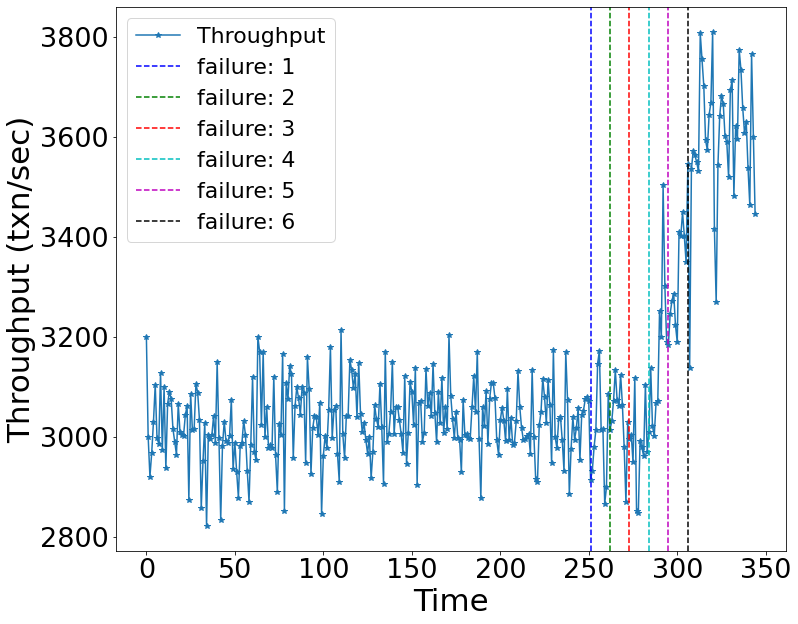

<Figure size 432x288 with 0 Axes>

In [68]:

from itertools import cycle
cycol = cycle('bgrcmk')


fig = pl.figure(figsize = (12, 10))
fig.patch.set_facecolor('white')
pl.plot(s1,s2, '-*', label = 'Throughput')

pl.axvline(x = 180+71, color = next(cycol), linestyle='--', label = 'failure: 1')
pl.axvline(x = 180+82, color = next(cycol), linestyle='--', label = 'failure: 2')
pl.axvline(x = 180+93, color = next(cycol), linestyle='--', label = 'failure: 3')
pl.axvline(x = 180+104, color = next(cycol), linestyle='--', label = 'failure: 4')
pl.axvline(x = 180+115, color = next(cycol), linestyle='--', label = 'failure: 5')
pl.axvline(x = 180+126, color = next(cycol), linestyle='--', label = 'failure: 6')

pl.legend()
pl.xlabel('Time')
pl.ylabel('Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# pl.ylim(0,50)
pl.savefig(experiment+'/MultiNodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

(0.0, 0.6)

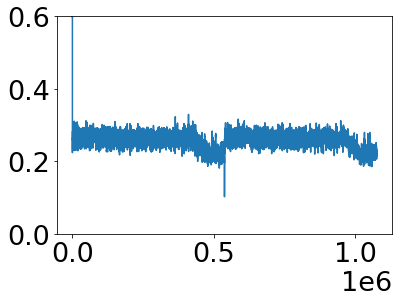

In [69]:
pl.plot(lats)
pl.ylim(0,0.6)

In [70]:
np.savetxt(experiment + '/throughput_data.txt',np.array([s1,s2]))

In [71]:
# np.savetxt?

hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
